## PERSONALITY (INTROVER OR EXTROVERT)

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) 🧩 Problem Statement
In today's fast-paced and highly social world, understanding human behavior — especially personality traits like introversion and extroversion — is crucial for improving workplace collaboration, enhancing educational experiences, and tailoring mental health interventions.

This machine learning project aims to develop a predictive model that can accurately classify individuals as either introverts or extroverts based on their responses to a psychological questionnaire or behavioral dataset. By analyzing patterns in the data, we seek to automate and scale personality assessment, which is traditionally done through manual tests like the MBTI or Big Five.

The goal is to explore, preprocess, and train a model on the dataset to understand the key features that influence personality type and evaluate how well machine learning algorithms can perform on this task.

This solution has potential applications in:

HR and recruitment, to match roles with personality fit

Education, for tailoring learning styles

Mental health, for better self-awareness and support toolsProblem Statement 

### 2) Data Colection

Dataset Source - https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data?resource=download

The dataset contains 2,900 rows and 8 columns


### 2.1) Import Data And Required Packages 

pandas numpy matplotlip seaborn etc

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### import csv data as Panda dataframe


In [10]:
df = pd.read_csv('personality_dataset.csv')

### show top 5 records

In [12]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [21]:
print(df['Personality'].unique())
print(df['Friends_circle_size'].unique())
print(df['Time_spent_Alone'].unique())
print(df.columns)

['Extrovert' 'Introvert']
[13.  0.  5. 14.  8.  6.  7. 15.  4. 10.  1. 12.  2. 11.  9.  3. nan]
[ 4.  9.  0.  3.  1.  2. 10.  6.  5.  8. nan  7. 11.]
Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')


### shape of the dataset


In [13]:
df.shape

(2900, 8)

### Dataset informaion 
1. Time_spent_Alone
2. Stage_fear
3. Social_event_attendance
4. Going_outside
5. Drained_after_socializing
6. Friends_circle_size
7. Post_frequency
8. Personality(intorvert/extrovert)

every features are measured in number 

### 3) Checking the data to perform 
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1) Checking Missing Values

In [22]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

### ⚠️ Missing Values Insight
Upon inspection, several features in the dataset contain a significant number of missing values, particularly in core behavioral indicators such as Drained_after_socializing, Time_spent_Alone, and Friends_circle_size. The target column Personality has no missing values, which is good.

While it might be tempting to drop rows with missing values entirely, doing so could result in a substantial loss of valuable data, which may negatively affect the training and generalization of our machine learning model.

Therefore, instead of dropping missing entries outright, we will explore imputation techniques such as:

Mean/Median imputation for numeric features

KNN imputation for more context-aware filling

Possibly dropping columns or rows only if the missing rate exceeds a certain threshold (e.g., 40%)

### visualize missing value

c:\Users\USER\Downloads\machine learning\project\inttroversion-extroversion-ml\venv\Lib\site-packages\missingno\missingno.py:271: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<Axes: >

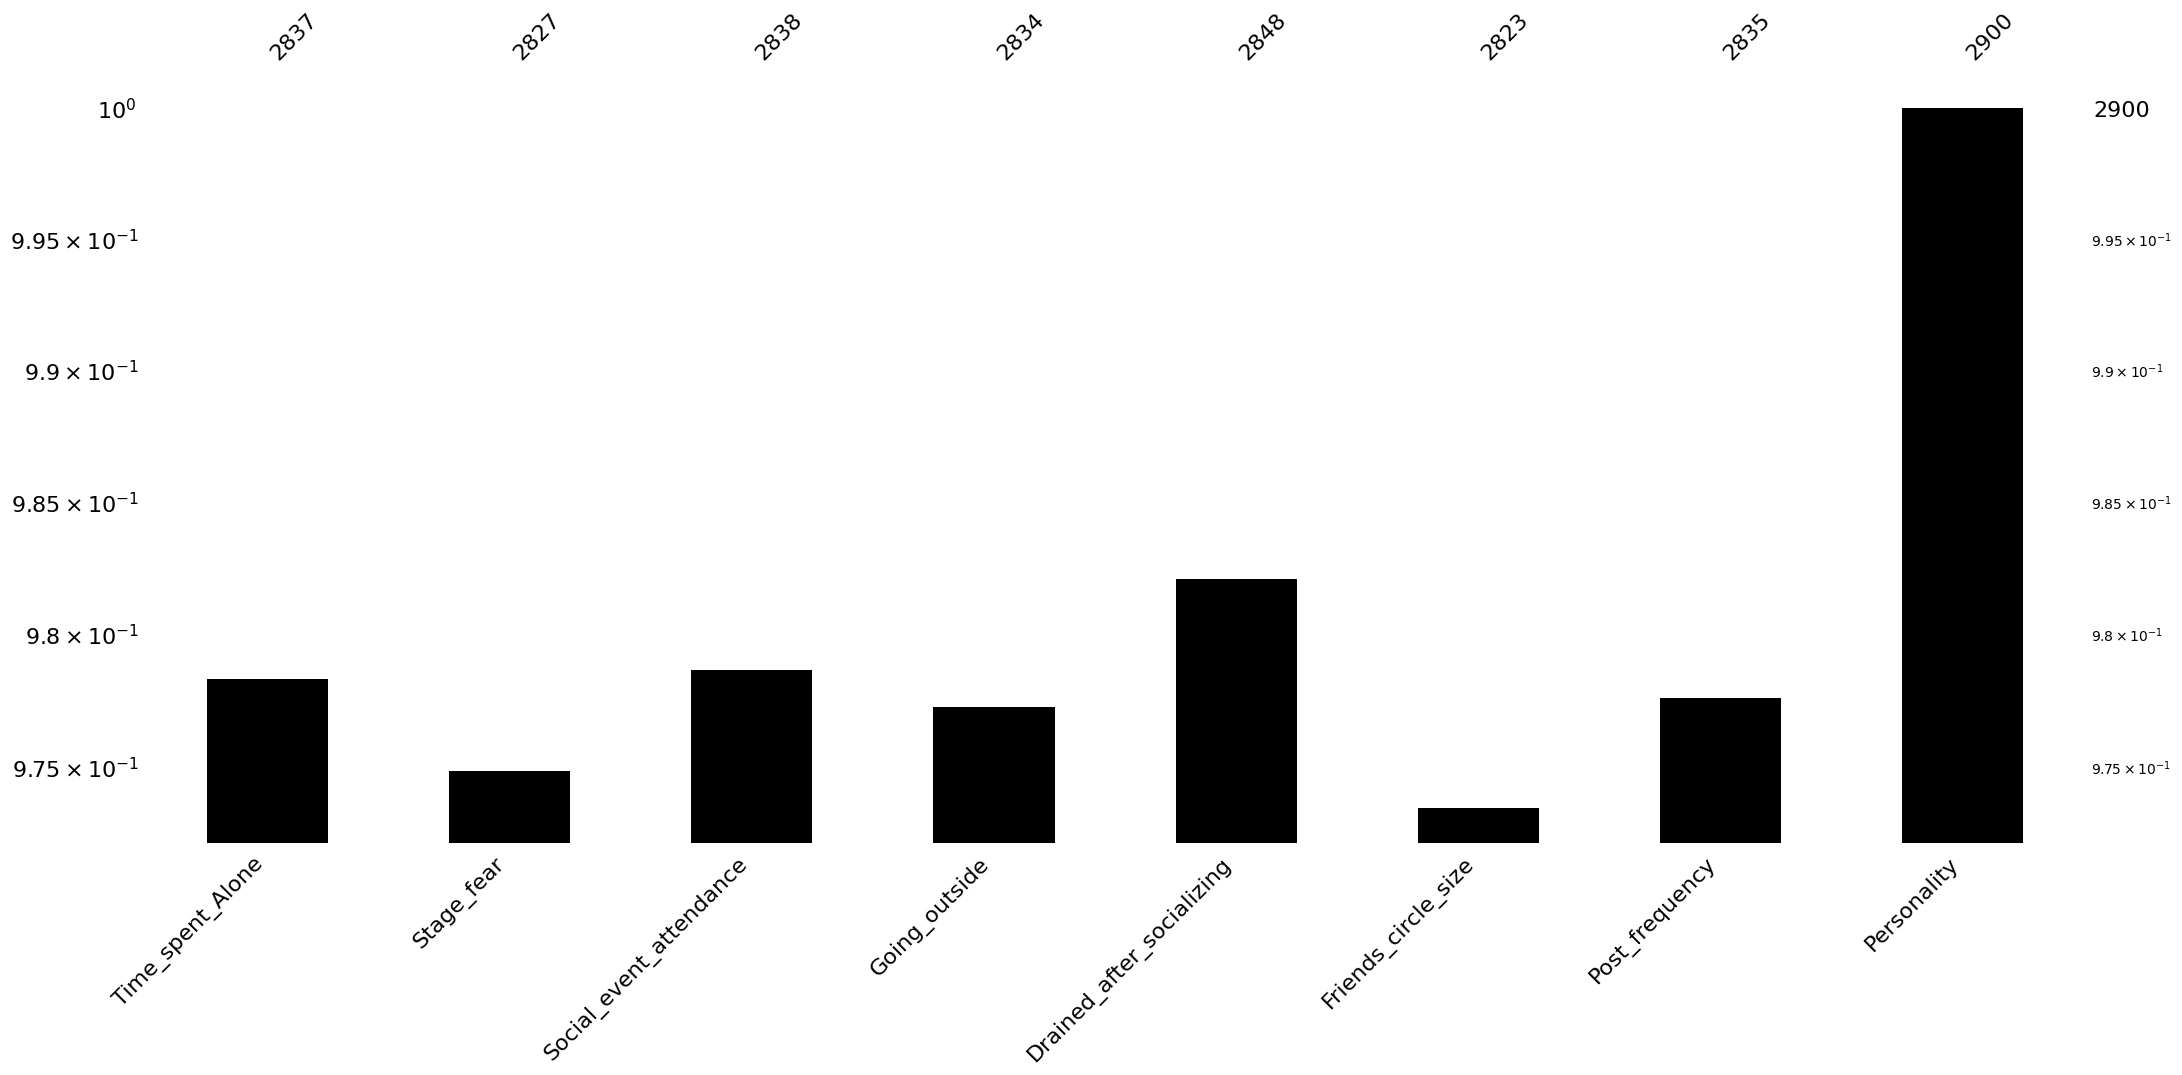

In [40]:
import missingno as msno

msno.bar(df,log= True, color= 'black', label_rotation= 45,labels= True )


### 3.2) Checking Duplicates 

In [41]:
df.duplicated().sum()

np.int64(388)

there are about 388 duuplicated values in dataset


### 3.3) checking data types

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


### 3.4) Checking the number of unit values

In [44]:
df.nunique()

Time_spent_Alone             12
Stage_fear                    2
Social_event_attendance      11
Going_outside                 8
Drained_after_socializing     2
Friends_circle_size          16
Post_frequency               11
Personality                   2
dtype: int64

### 3.5) checking statistic of the data

In [46]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


🔍 Key Observations
Time_spent_Alone shows a wide spread (std = 3.48) with values ranging from 0 to 11, indicating diverse solitude preferences.

Social_event_attendance has a similar variance and is moderately skewed toward the lower range.

Going_outside has a relatively lower mean and max (7.0), suggesting limited variation in outdoor activity.

Friends_circle_size shows a high standard deviation (4.29), indicating a wide range of social networks among individuals.

Post_frequency (e.g. social media use) also displays significant variation, with values from 0 to 10